In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
Project=pd.read_csv("Test_data.csv")

In [3]:
Project

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [4]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [6]:
Project.shape

(23490, 13)

In [9]:
Project.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
Project['education'] = Project['education'].fillna('Unknown')

In [11]:
Project.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [15]:
Project['previous_year_rating'] = Project['previous_year_rating'].fillna(Project['previous_year_rating'].median())

In [16]:
Project.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [17]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [19]:
rename_map = {
    "KPIs_met >80%": "kpis_met_80",
    "awards_won?": "awards_won",
}
Project = Project.rename(columns={k: v for k, v in rename_map.items() if k in Project.columns})

In [21]:
Project.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpis_met_80', 'awards_won', 'avg_training_score'],
      dtype='object')

In [22]:
Project.duplicated().sum()

0

In [23]:
Project['Performance_Score'] = (
    Project['kpis_met_80'] * 0.30 +
    Project['previous_year_rating'] * 0.25 +
    Project['avg_training_score'] * 0.20 +
    Project['awards_won'] * 0.10 +
    Project['no_of_trainings'] * 0.10 +
    Project['length_of_service'] * 0.05
)

In [24]:
Project

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_80,awards_won,avg_training_score,Performance_Score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0.0,1,1,0,77,15.85
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,11.30
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,9.95
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,14.25
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,13.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,13.10
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,16.00
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,11.30
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,0.0,1,0,0,70,14.35


In [33]:
Project['Performance_Score'].head()

0    15.85
1    11.30
2     9.95
3    14.25
4    13.65
Name: Performance_Score, dtype: float64

In [34]:
Project['Performance_Score'].tail()

23485    13.10
23486    16.00
23487    11.30
23488    14.35
23489    19.90
Name: Performance_Score, dtype: float64

In [40]:
def performance_rating(score):
    if score >= 16.5:
        return 'High'
    elif score >= 12.1:
        return 'Medium'
    else:
        return 'Low'

Project['Performance_Rating'] = Project['Performance_Score'].apply(performance_rating)

In [41]:
Project

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_80,awards_won,avg_training_score,Performance_Score,Performance_Rating
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0.0,1,1,0,77,15.85,Medium
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,11.30,Low
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,9.95,Low
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,14.25,Medium
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,13.65,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,13.10,Medium
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,16.00,Medium
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,11.30,Low
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,0.0,1,0,0,70,14.35,Medium


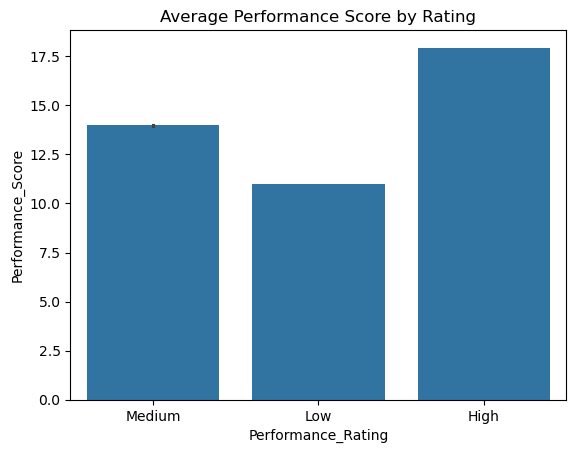

In [42]:
sns.barplot(x='Performance_Rating', y='Performance_Score', data=Project)
plt.title("Average Performance Score by Rating")
plt.show()

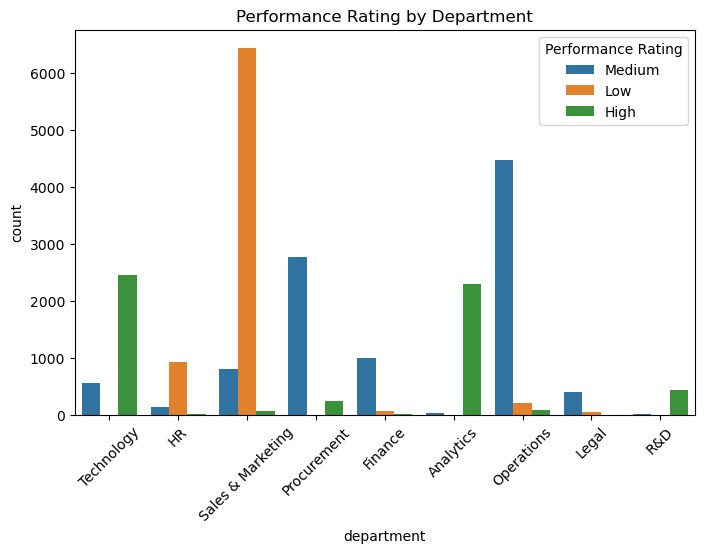

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='department',
    hue='Performance_Rating',
    data=Project)
plt.title("Performance Rating by Department")
plt.xticks(rotation=45)
plt.legend(title='Performance Rating')
plt.show()

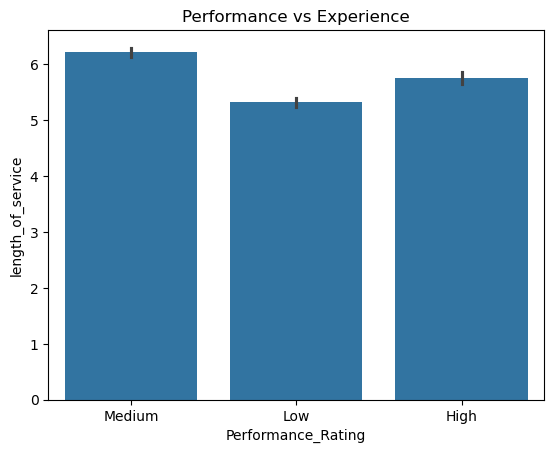

In [48]:
sns.barplot(x='Performance_Rating', y='length_of_service', data=Project)
plt.title("Performance vs Experience")
plt.show()

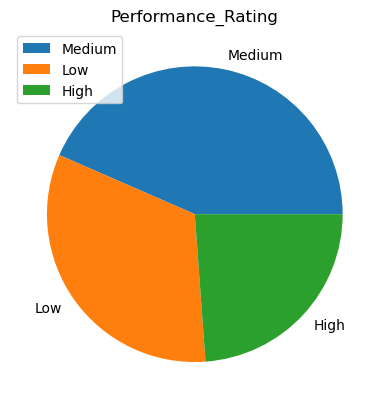

In [49]:
Project["Performance_Rating"].value_counts().plot(kind="pie",legend=True)
plt.title("Performance_Rating")
plt.ylabel("")
plt.show()

In [52]:
Project['Performance_Rating'].value_counts().reset_index()

,Performance_Rating,count
0,Medium,10206
1,Low,7683
2,High,5601


In [59]:
Project['gender'].value_counts().reset_index()

,gender,count
0,m,16596
1,f,6894


Text(0, 0.5, 'Number of Employees')

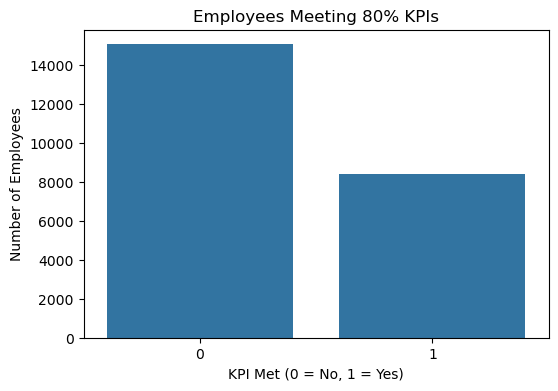

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x='kpis_met_80', data=Project)

plt.title('Employees Meeting 80% KPIs')
plt.xlabel('KPI Met (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')

In [62]:
Project.groupby('education')['Performance_Score'].mean().sort_values(ascending=False)

education
Master's & above    14.262292
Below Secondary     13.962433
Bachelor's          13.896521
Unknown             12.761605
Name: Performance_Score, dtype: float64

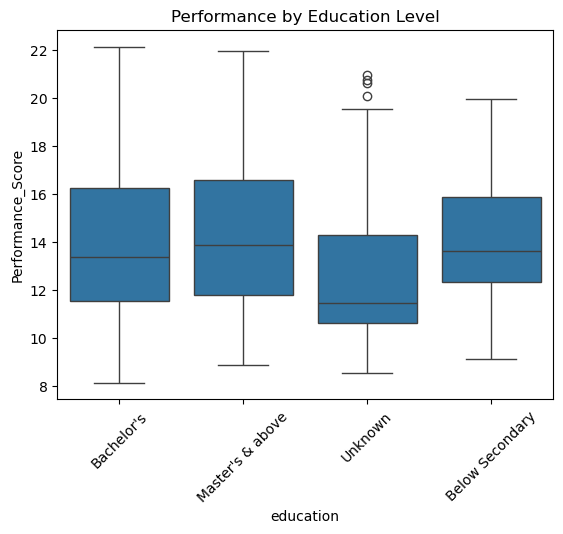

In [63]:
sns.boxplot(x='education', y='Performance_Score', data=Project)
plt.xticks(rotation=45)
plt.title("Performance by Education Level")
plt.show()

In [70]:
Project.groupby(["department","Performance_Rating"])["kpis_met_80"].mean().reset_index()

,department,Performance_Rating,kpis_met_80
0,Analytics,High,0.406646
1,Analytics,Medium,0.218750
2,Finance,High,0.647059
3,Finance,Low,0.281690
4,Finance,Medium,0.400798
5,HR,High,0.846154
6,HR,Low,0.310345
7,HR,Medium,0.555556
8,Legal,High,0.000000
9,Legal,Low,0.229167


In [72]:
df_numeric = Project.select_dtypes(include=["number"])

In [74]:
df_numeric.corr()["Performance_Score"].sort_values(ascending=False)

Performance_Score       1.000000
avg_training_score      0.982642
previous_year_rating    0.210011
kpis_met_80             0.154047
awards_won              0.082786
length_of_service       0.069848
no_of_trainings         0.054083
age                     0.036844
employee_id            -0.010760
Name: Performance_Score, dtype: float64

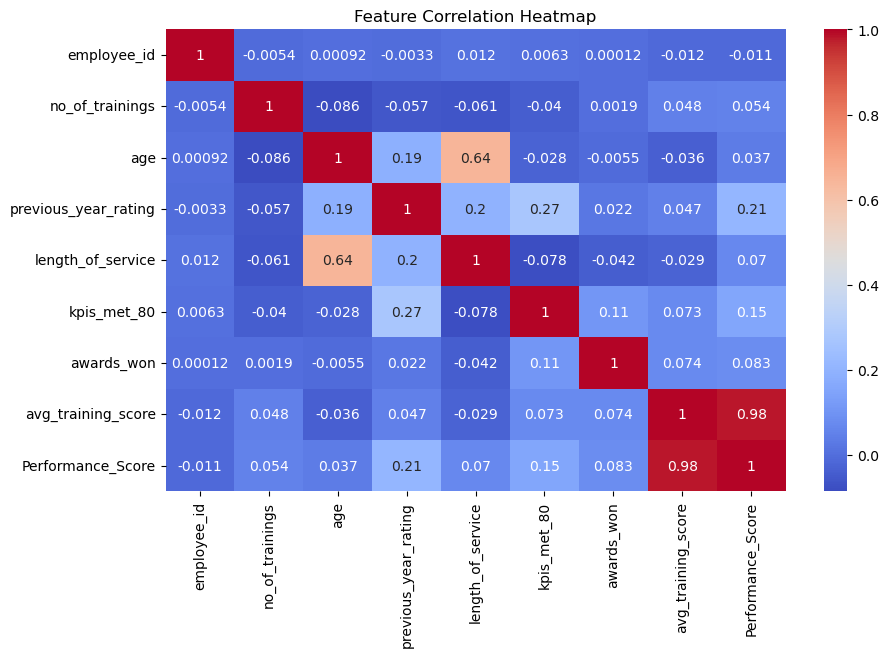

In [76]:
num_cols = Project.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()